Predict Award Share Rank<br>

Input File: 'data_clean.csv' <br>

Output File 1: 'result_approach2.csv' for hyperparam tuning<br>
Output File 2: 'result_compare_approach2.csv' for best model (Not Neural Netwok) prediction comparion of each year<br>
Output File 3: 'result_compare_nn_approach2.csv'for best Neural Network model prediction comparion of each year<br>
Output File 4: 'namelist_approach2.csv' for predicted 2020 namelist (Not Neural Network)<br>
Output File 5: 'namelist_nn_approach2.csv' for predicted 2020 namelist (Neural Network)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


In [2]:
data = pd.read_csv('data_clean.csv',index_col = False)

In [3]:
#from the data description use award_share as y variable
year = 'season'
player = 'player'
num_col = ['vorp', 'fta', 'efg', 'stl', 'trb', 'blk', 'fg%', 'ft%', 'tov', 'g', 'ast', '3p%', 'fg3a', 'pf', 'mp', 'fga', 'age', 'experience', 'vorp_rt', 'vorp_sq', 'fta_rt', 'fta_sq', 'efg_rt', 'efg_sq', 'stl_rt', 'stl_sq', 'trb_rt', 'trb_sq', 'blk_rt', 'blk_sq', 'fg%_rt', 'fg%_sq', 'ft%_rt', 'ft%_sq', 'tov_rt', 'tov_sq', 'g_rt', 'g_sq', 'ast_rt', 'ast_sq', '3p%_rt', '3p%_sq', 'fg3a_rt', 'fg3a_sq', 'pf_rt', 'pf_sq', 'mp_rt', 'mp_sq', 'fga_rt', 'fga_sq', 'age_rt', 'age_sq', 'experience_rt', 'experience_sq']
dummy_col = ['pos_C', 'pos_PF', 'pos_PG', 'pos_SF', 'pos_SG',
             'team_ATL', 'team_BOS', 'team_BRK', 'team_CHA', 
             'team_CHH', 'team_CHI', 'team_CHO', 'team_CLE', 
             'team_DAL', 'team_DEN', 'team_DET', 'team_GSW', 
             'team_HOU', 'team_IND', 'team_KCK', 'team_LAC', 'team_LAL', 'team_MEM', 'team_MIA', 'team_MIL', 'team_MIN', 'team_NJN', 'team_NOH', 'team_NOP', 'team_NYK', 'team_OKC', 'team_ORL', 'team_PHI', 'team_PHO', 'team_POR', 'team_SAC', 'team_SAS', 'team_SEA', 'team_TOR', 'team_TOT', 'team_UTA', 'team_WAS', 'team_WSB']
X_col =  num_col.copy()
X_col.extend(dummy_col)
y_col = 'award_share'

In [4]:
#get the rank for award share
data2 = pd.DataFrame()
for s in list(set(data['season_x'].values).difference(set([2020]))):
    data_temp = data[data['season_x'] == s]
    data_temp['rank'] = data_temp[y_col].rank(method = 'dense',pct = 'True')
    data2 = pd.concat([data2,data_temp])
#concat the data for 2020
data2 = pd.concat([data2,data[data['season_x'] == 2020]])
#use rank as y
data = data2
y_col =  'rank'

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


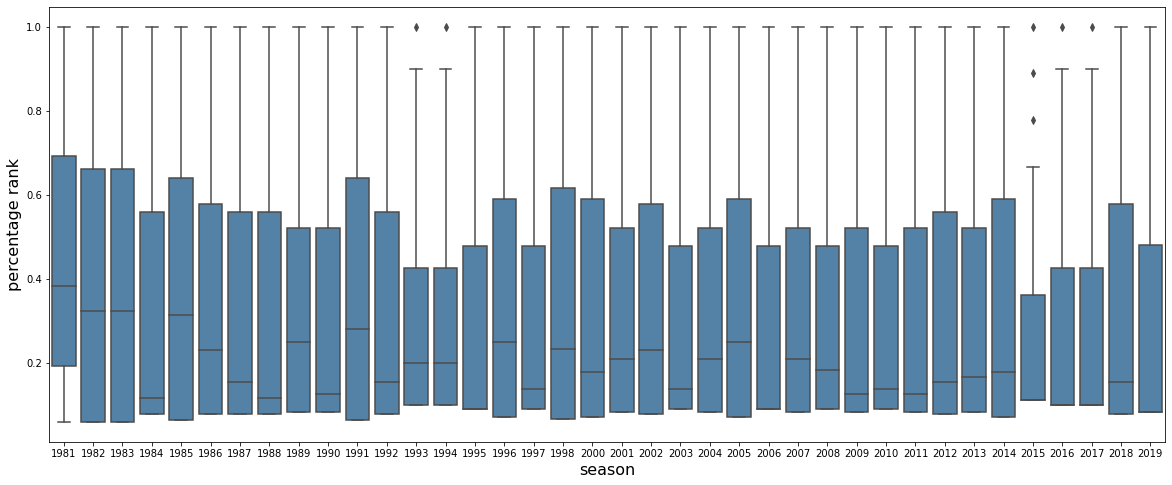

In [5]:
plt.subplots(figsize=(20, 8))
sns.boxplot(x = 'season_x', y = 'rank', data = data[data['season_x']<2020],color = 'steelblue')
plt.xlabel('season',fontsize = 16)
plt.ylabel('percentage rank',fontsize = 16)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [5]:
def mean_absolute_percentage_error(y_val,y_predict):
    y_val,y_predict = np.array(y_val),np.array(y_predict)
    return np.mean(np.abs((y_val - y_predict) / y_val))

In [7]:
#normalize the numericate cols
def norm_num(X_train):    
    X_train_num =pd.DataFrame(StandardScaler().fit_transform(X_train[num_col]))
    X_train_dummy = pd.DataFrame(X_train[dummy_col].to_numpy())
    X_train = pd.concat([X_train_num,X_train_dummy],axis = 1).to_numpy()
    return X_train

In [8]:
#set the params for each model
def get_Ridge_param():
    param = []
    for alpha in [1e-5,1e-4,1e-3,0.01,0.1]:
        param.append({'alpha':alpha,'random_state':221})
    return param

def get_Lasso_param():
    param = []
    for alpha in [1e-5,1e-4,1e-3,0.01,0.1]:
        param.append({'alpha':alpha,'random_state':221})
    return param

def get_ElasticNet_param():
    param = []
    for alpha in [1e-5,1e-4,1e-3,0.01,0.1]:
        for l1_ratio in [0.1,0.3,0.5,0.7,0.9]:
            param.append({'alpha':alpha,'l1_ratio':l1_ratio,'random_state':221})
    return param

def get_SVR_param():
    param = []
    for kernel in ['linear','rbf','sigmoid']:
        for C in [0.1,1,10,100,1000]:
            param.append({'kernel':kernel,'C':C})
    kernel = 'poly'
    for degree in [2,3,4,5]:
        for C in [0.1,1,10,100,1000]:
            param.append({'kernel':kernel,'degree':degree,'C':C})
    return param

def get_RandomForestRegressor_param():
    param = []
    for n_estimators in [50,100,200]:
        for criterion in ['mse','mae']:
            param.append({'n_estimators':n_estimators,'criterion':criterion,'random_state':221})
    return param

def get_GradientBoostingRegressor_param():
    param = []
    for learning_rate in [0.001,0.01,0.1,1]:
        for n_estimators in [10,100,200]:
            param.append({'learning_rate':learning_rate,'n_estimators':n_estimators,'random_state':221})
    return param

def get_AdaBoostRegressor_param():
    param = []
    for learning_rate in [0.001,0.01,0.1,1]:
        for n_estimators in [10,100,200]:
            param.append({'learning_rate':learning_rate,'n_estimators':n_estimators,'random_state':221})
    return param

def get_MLPRegressor_param():
    param = []
    for alpha in [1e-4,1e-5,1e-6]:
        for hidden_layer_sizes in [(100,),(200,),(300,)]:
            param.append({'alpha':alpha,'hidden_layer_sizes':hidden_layer_sizes,'random_state':221})
    return param


In [9]:
models = [LinearRegression,Ridge,Lasso,ElasticNet,SVR,RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,MLPRegressor]

#models = [LinearRegression,Ridge,Lasso,ElasticNet,MLPRegressor]

param = {
    LinearRegression.__name__:[{}],         
    Ridge.__name__:get_Ridge_param(),
    Lasso.__name__:get_Lasso_param(),
    ElasticNet.__name__:get_ElasticNet_param(),
    SVR.__name__:get_SVR_param(),
    RandomForestRegressor.__name__:get_RandomForestRegressor_param(),
    GradientBoostingRegressor.__name__:get_GradientBoostingRegressor_param(),
    AdaBoostRegressor.__name__:get_AdaBoostRegressor_param(),
    MLPRegressor.__name__:get_MLPRegressor_param(),
}

In [9]:
i = 0
#result for each model each param
result = pd.DataFrame(columns = ['model','param','mae_avg','mse_avg','mape_avg','mvp_avg','top3_order_avg','top3_coverage_avg','mvp_in_top3_avg','mvp_in_top5_avg'])
best_mvp_avg = 0
best_nn_mvp_avg = 0

for m in models:    
    for index,p in enumerate(param[m.__name__]):
        mae = []
        mse = []
        mape = []
        mvp = []
        top3_order = []
        top3_coverage = []
        mvp_in_top3 = []
        mvp_in_top5 = []
        for s in list(set(data['season_x'].values).difference(set([2020]))):
            #2020 didn't have target share data
            data_temp = data[data['season_x'] != 2020]
            #train_test split
            X_train = data_temp[data_temp['season_x'] != s][X_col]
            y_train = data_temp[data_temp['season_x'] != s][y_col]
            X_val = data_temp[data_temp['season_x'] == s][X_col]
            y_val = data_temp[data_temp['season_x'] == s][y_col]
            #normalize the numerical columns separately for train and validation set
            X_train = norm_num(X_train)
            X_val = norm_num(X_val)
            #predict the validation set
            model = m(**p)
            model.fit(X_train,y_train)
            y_predict = model.predict(X_val)
            #evaluation
            #mae
            mae.append(mean_absolute_error(y_val,y_predict))
            #mse
            mse.append(mean_squared_error(y_val,y_predict))
            #mape
            mape.append(mean_absolute_percentage_error(y_val,y_predict))
            #whehter correctly predict mvp
            mvp.append(np.sum(np.argmax(y_predict)== np.argmax(y_val.to_numpy())))
            #whether correctly predict first 3
            if np.sum(np.argsort(y_val.to_numpy())[::-1][:3] == np.argsort(y_predict)[::-1][:3]) == 3:
                top3_order.append(1)
            else:
                top3_order.append(0)
            #percentage of top 3 predictions are in true top 3 list
            top3_coverage.append((3 - len(set(np.argsort(y_val.to_numpy())[::-1][:3]).difference(set(np.argsort(y_predict)[::-1][:3]))))/3)
            #mvp_in_top3
            mvp_in_top3.append(np.sum(np.argsort(y_val.to_numpy())[::-1][:1] in np.argsort(y_predict)[::-1][:3]))
            #mvp_in_top5
            mvp_in_top5.append(np.sum(np.argsort(y_val.to_numpy())[::-1][:1] in np.argsort(y_predict)[::-1][:5]))
        
        #average the evaluation over all years
        mae_avg = np.mean(mae)
        mse_avg = np.mean(mse)
        mape_avg = np.mean(mape)
        mvp_avg = np.mean(mvp)
        top3_order_avg = np.mean(top3_order)
        top3_coverage_avg = np.mean(top3_coverage)
        mvp_in_top3_avg = np.mean(mvp_in_top3)
        mvp_in_top5_avg = np.mean(mvp_in_top5)
        
        #add each result to the result table
        result.loc[i] = [m.__name__,p,mae_avg,mse_avg,mape_avg,mvp_avg,top3_order_avg,top3_coverage_avg,mvp_in_top3_avg,mvp_in_top5_avg]
        i += 1
        
        #select the best model for ml and dnn
        if m.__name__ != 'MLPRegressor':
            if mvp_avg > best_mvp_avg:
                best_mvp_avg = mvp_avg
                best_model = model
                print('Current Best MVP AVG:', mvp_avg)
                print('Current Best Model:' ,model)
        else:
            if mvp_avg > best_nn_mvp_avg:
                best_nn_mvp_avg = mvp_avg
                best_nn_model = model
                print('Current Best NN MVP AVG:', mvp_avg)
                print('Current Best NN Model:' ,model)
result.to_csv('result_approach2.csv')

Current Best MVP AVG: 0.5789473684210527
Current Best Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.173427109412001, tolerance: 0.008218662810615542
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.539910077279524, tolerance: 0.008187078295598995
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.627737958892958, tolerance: 0.008184206500305144
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number 

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.594073658209815, tolerance: 0.008237595213826207
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.822418017590628, tolerance: 0.008248087893232394
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.617126090478973, tolerance: 0.008215410306469936
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number 

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.8363813772400714, tolerance: 0.008222649776737413
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.343735162420554, tolerance: 0.008212166511634613
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.052359158498197, tolerance: 0.008224038665626302
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.855872471361696, tolerance: 0.008231720975197572
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.922211213975924, tolerance: 0.008237374585867437
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.87608217610332, tolerance: 0.008222649776737413
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number o

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.50121546281399, tolerance: 0.008233130964378164
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.384272017180935, tolerance: 0.008207518891556156
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.199446928389436, tolerance: 0.008230162885479172
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number o

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.314886580567034, tolerance: 0.008233130964378164
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.2331306923738, tolerance: 0.008225293340467194
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.316251789644344, tolerance: 0.008233769669510907
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.014934169741295, tolerance: 0.008226554233772228
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.91594548180363, tolerance: 0.008210749426524944
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.035959451252698, tolerance: 0.008237671849424777
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number o

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.59399169186889, tolerance: 0.008212166511634613
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.695695168698677, tolerance: 0.008257779649452616
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.704227860447192, tolerance: 0.00825746914578583
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.293140000411928, tolerance: 0.00823729763104483
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.466604341896526, tolerance: 0.008220548831111335
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.73812720334572, tolerance: 0.00819237294491334
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.197423923566772, tolerance: 0.008224303875461676
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.935528917204099, tolerance: 0.008215529976035614
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.843524164531967, tolerance: 0.008208801710022359
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.08942968263359, tolerance: 0.008187078295598995
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.837170666035014, tolerance: 0.008184206500305144
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.14526466835328, tolerance: 0.008208801710022359
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.153076718963087, tolerance: 0.008215410306469936
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.43029084191479, tolerance: 0.008204408757584507
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.779198944756271, tolerance: 0.008218662810615542
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.75297496908461, tolerance: 0.008254325447191136
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.654561278556137, tolerance: 0.008237595213826207
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.436421624103917, tolerance: 0.008248087893232394
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.24257114856135, tolerance: 0.008212166511634613
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.956600262461013, tolerance: 0.008224038665626302
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.294823797725151, tolerance: 0.00820155300329127
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5308491300049205, tolerance: 0.008222649776737413
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5932044354541368, tolerance: 0.008233769669510909
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5749589933370949, tolerance: 0.008222649776737413
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number 

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10165226477705147, tolerance: 0.008233130964378164
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0739650388192068, tolerance: 0.008225293340467194
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07978136078632403, tolerance: 0.008233769669510907
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0770512830997312, tolerance: 0.008237671849424777
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04041029839832788, tolerance: 0.008198238713704219
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02959082112457878, tolerance: 0.00820478930327793
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number

Current Best NN MVP AVG: 0.5
Current Best NN Model: MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=221, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)


In [21]:
result

,model,param,mae_avg,mse_avg,mape_avg,mvp_avg,top3_order_avg,top3_coverage_avg,mvp_in_top3_avg,mvp_in_top5_avg
0,LinearRegression,{},0.152852,0.036669,0.975208,0.578947,0.078947,0.692982,0.894737,0.947368
1,Ridge,"{'alpha': 1e-05, 'random_state': 221}",0.152865,0.036679,0.975307,0.578947,0.078947,0.692982,0.894737,0.947368
2,Ridge,"{'alpha': 0.0001, 'random_state': 221}",0.152805,0.036662,0.974844,0.578947,0.078947,0.692982,0.894737,0.947368
3,Ridge,"{'alpha': 0.001, 'random_state': 221}",0.152419,0.036552,0.971883,0.578947,0.078947,0.692982,0.894737,0.947368
4,Ridge,"{'alpha': 0.01, 'random_state': 221}",0.151881,0.036375,0.967821,0.578947,0.078947,0.692982,0.894737,0.947368
5,Ridge,"{'alpha': 0.1, 'random_state': 221}",0.151785,0.036317,0.965458,0.552632,0.052632,0.675439,0.894737,0.947368
6,Lasso,"{'alpha': 1e-05, 'random_state': 221}",0.151657,0.036237,0.962661,0.552632,0.052632,0.666667,0.894737,0.947368
7,Lasso,"{'alpha': 0.0001, 'random_state': 221}",0.151026,0.035982,0.954342,0.552632,0.052632,0.666667,0.894737,0.947368
8,Lasso,"{'alpha': 0.001, 'random_state': 221}",0.148162,0.034994,0.920959,0.552632,0.026316,0.675439,0.894737,0.921053
9,Lasso,"{'alpha': 0.01, 'random_state': 221}",0.154243,0.037178,0.946499,0.578947,0.052632,0.684211,0.894737,0.947368


In [22]:
best_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
best_nn_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=221, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

Compare the best model result for each year

In [24]:
#print the prediction for each year of best_model
result_compare = pd.DataFrame(index = data.index,columns = ['season','player','true','true_rank','pred','pred_rank'])
for s in list(set(data['season_x'].values).difference(set([2020]))):
    #2020 didn't have target share data
    data_temp = data[data['season_x'] != 2020]
    #train_test split
    X_train = data_temp[data_temp['season_x'] != s][X_col]
    y_train = data_temp[data_temp['season_x'] != s][y_col]
    X_val = data_temp[data_temp['season_x'] == s][X_col]
    y_val = data_temp[data_temp['season_x'] == s][y_col]
    #normalize the numerical columns separately for train and validation set
    X_train = norm_num(X_train)
    X_val = norm_num(X_val)
    #predict the validation set
    model = best_model
    model.fit(X_train,y_train)
    y_predict = model.predict(X_val)
    result_compare['player'].loc[y_val.index] = data_temp[data_temp['season_x'] == s]['player']
    result_compare['season'].loc[y_val.index] = data_temp[data_temp['season_x'] == s]['season_x']
    result_compare['true'].loc[y_val.index] = y_val
    result_compare['true_rank'].loc[y_val.index] = y_val.rank(method = 'dense',ascending = False)
    result_compare['pred'].loc[y_val.index] = y_predict
    result_compare['pred_rank'].loc[y_val.index] = pd.Series(y_predict,index = y_val.index).rank(method = 'dense',ascending = False)

In [25]:
result_compare.to_csv('result_compare_approach2.csv')

In [15]:
#print the prediction for each year of best_model
result_compare = pd.DataFrame(index = data.index,columns = ['season','player','true','true_rank','pred','pred_rank'])
for s in list(set(data['season_x'].values).difference(set([2020]))):
    #2020 didn't have target share data
    data_temp = data[data['season_x'] != 2020]
    #train_test split
    X_train = data_temp[data_temp['season_x'] != s][X_col]
    y_train = data_temp[data_temp['season_x'] != s][y_col]
    X_val = data_temp[data_temp['season_x'] == s][X_col]
    y_val = data_temp[data_temp['season_x'] == s][y_col]
    #normalize the numerical columns separately for train and validation set
    X_train = norm_num(X_train)
    X_val = norm_num(X_val)
    #predict the validation set
    model = best_nn_model
    model.fit(X_train,y_train)
    y_predict = model.predict(X_val)
    result_compare['player'].loc[y_val.index] = data_temp[data_temp['season_x'] == s]['player']
    result_compare['season'].loc[y_val.index] = data_temp[data_temp['season_x'] == s]['season_x']
    result_compare['true'].loc[y_val.index] = y_val
    result_compare['true_rank'].loc[y_val.index] = y_val.rank(method = 'dense',ascending = False)
    result_compare['pred'].loc[y_val.index] = y_predict
    result_compare['pred_rank'].loc[y_val.index] = pd.Series(y_predict,index = y_val.index).rank(method = 'dense',ascending = False)

In [16]:
result_compare.to_csv('result_compare_nn_approach2.csv')

predict 2020

In [16]:
data_temp = data[data['season_x'] != 2020]
X_train = data_temp[X_col]
y_train = data_temp[y_col]
X_val = data[data['season_x'] == 2020][X_col]
X_train = norm_num(X_train)
X_val = norm_num(X_val)
#use best model to predict 2020
model = best_model
model.fit(X_train,y_train)
y_predict = model.predict(X_val)

predict_share = pd.DataFrame(data = y_predict,columns = ['predict_share'],index = data[data['season_x'] == 2020]['player'].to_list())
predict_share = predict_share.sort_values('predict_share',ascending= False)

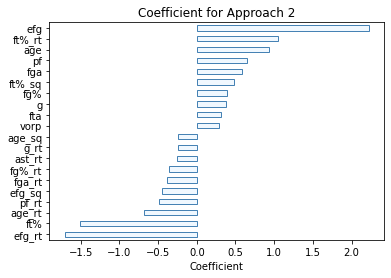

In [25]:
coef = pd.Series(model.coef_[0],index = X_col)
pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)]).plot.barh(color = 'aliceblue',edgecolor = 'steelblue')
plt.title('Coefficient for Approach 2')
plt.xlabel('Coefficient')
plt.show()

In [12]:
predict_share.to_csv('namelist_approach2.csv')

In [13]:
data_temp = data[data['season_x'] != 2020]
X_train = data_temp[X_col]
y_train = data_temp[y_col]
X_val = data[data['season_x'] == 2020][X_col]
X_train = norm_num(X_train)
X_val = norm_num(X_val)
#use best model to predict 2020
model = MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=221, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
model.fit(X_train,y_train)
y_predict = model.predict(X_val)

predict_share = pd.DataFrame(data = y_predict,columns = ['predict_share'],index = data[data['season_x'] == 2020]['player'].to_list())
predict_share = predict_share.sort_values('predict_share',ascending= False)

In [15]:
predict_share.to_csv('namelist_nn_approach2.csv')